# Exploratory Data Analysis on TACO Dataset

## Plan of Action:
- Get details of images
- Check validity of annotations
    - Check that the number of label files matches the number of images
    - Inspect some images and check whether the bounding box/es have been done correctly
- Check splitting of dataset is done correctly
    - Count number of images in train and test set


In [1]:
# Importing Auxiliary Libraries
import os
import numpy as np
import pandas as pd

# For Image processing
from PIL import Image

# For Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Settings
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

### Check Classes in folder

In [2]:
image_path = './data/taco/images'

In [4]:
train_samples = len(os.listdir(os.path.join(image_path, 'train')))
test_samples = len(os.listdir(os.path.join(image_path, 'test')))
print('Number of Training Samples:', train_samples)
print('Number of  Validation Samples:', test_samples)

Number of Training Samples: 1415
Number of  Validation Samples: 142


In [7]:
total_samples = train_samples + test_samples
print('Train : Validation Split')
print(f'{round(train_samples/total_samples*100, 1)}' + '  : ' + f'{round(test_samples/total_samples*100, 1)}')

Train : Validation Split
90.9  : 9.1


### Get details of images

In [8]:
# Initialize Class Labels
class_labels =  {0: 'Aluminium Foil',
                1: 'Bottle',
                2: 'Bottle Cap',
                3: 'Can',
                4: 'Carton',
                5: 'Cup',
                6: 'Food Waste',
                7: 'Other Plastic',
                8: 'Paper Trash',
                9: 'Plastic Trash',
                10: 'Unlabeled Litter',
                11: 'Cigarette'}

In [18]:
# Initialise lists
list_dataset = []
list_img_name =[]
list_num_obj = []
list_format = []
list_mode = []
list_format_mode =[]
list_height = []
list_width = []
list_aspect_ratio = []
list_aspect_ratio_max = []


In [19]:
for dataset in os.listdir(image_path):
    for img_name in os.listdir(os.path.join(image_path, dataset)):
        # Get dataset type (train or test)
        list_dataset.append(dataset)
        # Get image name
        list_img_name.append(img_name)
        # Get number of objected annotated
        with open ('./data/taco/labels/' + dataset + '/' + img_name[:-4] + '.txt', "r") as f:
            list_num_obj.append(len(f.readlines()))
        # Get format of image
        list_format.append(img_name.split('.')[-1])
        # Open image to extract more details
        img = Image.open('./data/taco/images/' + dataset + '/' + img_name)
        width, height = img.size
        # Get mode of image
        list_mode.append(img.mode)
        # Get format_mode
        list_format_mode.append(img_name.split('.')[-1] + '_' + img.mode)
        # Get width
        list_width.append(width)
        # Get height
        list_height.append(height)
        # Get aspect ratio of image
        list_aspect_ratio.append(width/height)
        list_aspect_ratio_max.append(np.maximum(width/height,height/width))
        



In [21]:
images_profiles = pd.DataFrame(data={'dataset': list_dataset,
                                     'img_name': list_img_name,
                                     'num_obj_anno': list_num_obj,
                                     'format': list_format,
                                     'mode': list_mode,
                                     'format_mode': list_format_mode,
                                     'width': list_width,
                                     'height': list_height,
                                     'aspect_ratio': list_aspect_ratio,
                                     'aspect_ratio_max':list_aspect_ratio_max
                                    })

In [22]:
images_profiles

dataset              img_name  num_obj_anno format mode format_mode  \
0       test    batch_1_000003.jpg             1    jpg  RGB     jpg_RGB   
1       test  batch_3_IMG_4877.JPG             2    JPG  RGB     JPG_RGB   
2       test   batch_14_000008.jpg             1    jpg  RGB     jpg_RGB   
3       test  batch_3_IMG_4862.JPG             8    JPG  RGB     JPG_RGB   
4       test   batch_14_000034.jpg             1    jpg  RGB     jpg_RGB   
...      ...                   ...           ...    ...  ...         ...   
1552   train  batch_3_IMG_4932.JPG             5    JPG  RGB     JPG_RGB   
1553   train  batch_3_IMG_4926.JPG             1    JPG  RGB     JPG_RGB   
1554   train   batch_12_000033.jpg             6    jpg  RGB     jpg_RGB   
1555   train   batch_12_000027.jpg             3    jpg  RGB     jpg_RGB   
1556   train    batch_4_000023.JPG             1    JPG  RGB     JPG_RGB   

      width  height  aspect_ratio  aspect_ratio_max  
0      1537    2049      0.750122          1.333116  
1      2448    3264      0.750000          1.333333  
2      3120    4160      0.750000          1.333333  
3      2448    3264      0.750000          1.333333  
4      4032    3024      1.333333          1.333333  
...     ...     ...           ...               ...  
1552   2448    3264      0.750000          1.333333  
1553   2448    3264      0.750000          1.333333  
1554   5312    2988      1.777778          1.777778  
1555   5312    2988      1.777778          1.777778  
1556   3264    2448      1.333333          1.333333  

[1557 rows x 10 columns]

In [23]:
images_profiles.to_csv('images_profiles.csv',index=False)

### EDA on images profiles

In [24]:
images_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dataset           1557 non-null   object 
 1   img_name          1557 non-null   object 
 2   num_obj_anno      1557 non-null   int64  
 3   format            1557 non-null   object 
 4   mode              1557 non-null   object 
 5   format_mode       1557 non-null   object 
 6   width             1557 non-null   int64  
 7   height            1557 non-null   int64  
 8   aspect_ratio      1557 non-null   float64
 9   aspect_ratio_max  1557 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 121.8+ KB


#### Check categorical features

In [25]:
df = images_profiles.copy()

In [26]:
# Get a list of categorical features
features_obj = list(df.columns[df.dtypes == 'object'])
features_obj

['dataset', 'img_name', 'format', 'mode', 'format_mode']

In [27]:
def countplot_cat_features(df,features_obj:list):
    """ 
    Generate count plots for categorical features
    
    param df: the dataset in dataframe format
    param features_obj: list of feature names
    """
    for feature in features_obj:
        ax = sns.countplot(x=feature, data=df)
        ax.tick_params(axis='x', rotation=90)
        plt.show()

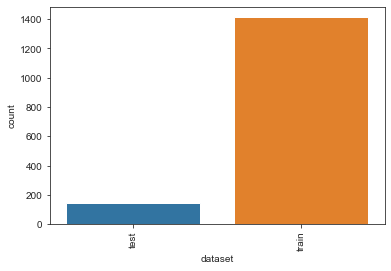

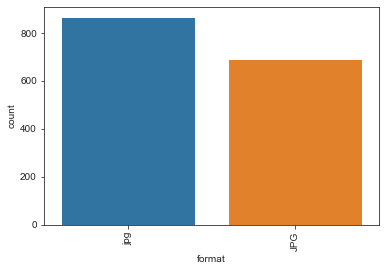

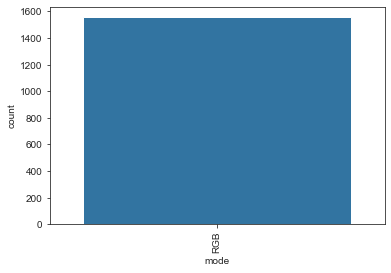

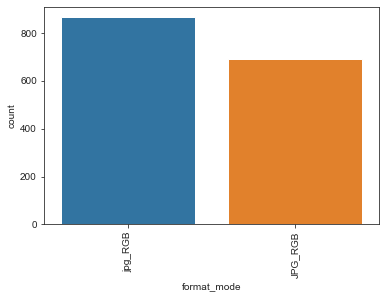

In [28]:
countplot_cat_features(df, [features_obj[0]] + features_obj[2:])

#### Check continuous features

In [29]:
images_profiles.describe().T

count         mean         std      min          25%  \
num_obj_anno      1557.0     2.877328    4.001411    0.000     1.000000   
width             1557.0  2970.637765  920.761906  842.000  2448.000000   
height            1557.0  3071.545922  675.728286  474.000  2448.000000   
aspect_ratio      1557.0     1.023040    0.405320    0.456     0.750000   
aspect_ratio_max  1557.0     1.449233    0.271361    1.000     1.333333   

                          50%          75%          max  
num_obj_anno         2.000000     3.000000    84.000000  
width             2624.000000  3264.000000  6000.000000  
height            3264.000000  3264.000000  4618.000000  
aspect_ratio         0.750000     1.333333     2.192982  
aspect_ratio_max     1.333333     1.333333     2.192982

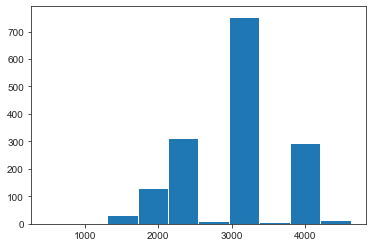

In [30]:
plt.hist(images_profiles['height'])
plt.show()

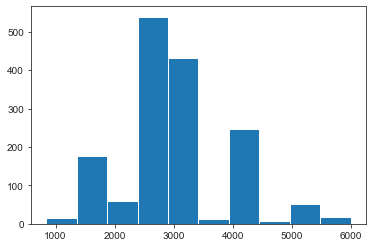

In [31]:
plt.hist(images_profiles['width'])
plt.show()

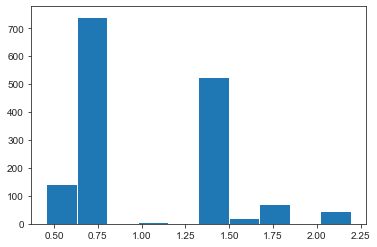

In [32]:
plt.hist(images_profiles['aspect_ratio'])
plt.show()

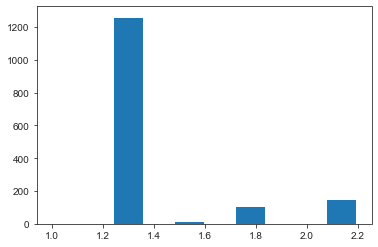

In [33]:
plt.hist(images_profiles['aspect_ratio_max'])
plt.show()

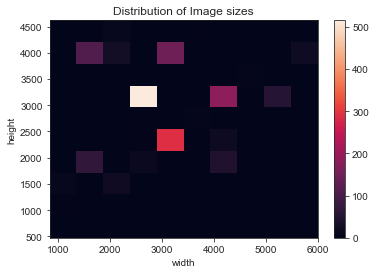

In [34]:
plt.hist2d(images_profiles['width'], images_profiles['height'])
plt.title('Distribution of Image sizes')
plt.xlabel('width')
plt.ylabel('height')
plt.colorbar()
plt.show()

### Check annotation of objects 

#### Check if all images are annotated

In [36]:
# Get list of images file name
train_images_path = './data/taco/images/train'
img_train_list = os.listdir(train_images_path)
img_train_list = [img_name[:-4] for img_name in img_train_list]

In [37]:
test_images_path = './data/taco/images/test'
img_test_list = os.listdir(test_images_path)
img_test_list = [img_name[:-4] for img_name in img_test_list]

In [38]:
# Get list of annotation file name
anno_train_list = os.listdir(train_images_path)
anno_train_list = [img_name[:-4] for img_name in anno_train_list]

In [39]:
anno_test_list = os.listdir(test_images_path)
anno_test_list = [img_name[:-4] for img_name in anno_test_list]

In [40]:
# Check the length of the lists
print(len(img_train_list))
print(len(img_test_list))
print(len(anno_train_list))
print(len(anno_test_list))

1415
142
1415
142


In [41]:
# Check for all images, if there is a corresponding annotation
print(img_train_list == anno_train_list)
print(img_test_list == anno_test_list)

True
True


#### Check for number of objects annotated in each image

In [42]:
# Get largest number of objects detected in images_profiles
images_profiles['num_obj_anno'].max()

84

In [43]:
# Get largest number of objects detected in images_profiles
images_profiles['num_obj_anno'].min()

0

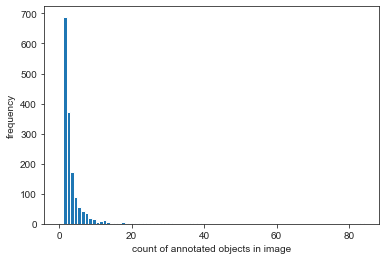

In [44]:
plt.hist(images_profiles['num_obj_anno'], [i for i in range(85)])
plt.xlabel('count of annotated objects in image')
plt.ylabel('frequency')
plt.show()

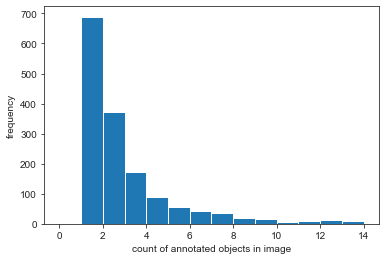

In [45]:
# zoomed in view
plt.hist(images_profiles['num_obj_anno'], [i for i in range(15)])
plt.xlabel('count of annotated objects in image')
plt.ylabel('frequency')
plt.show()

#### Check number of annotated objects in each class

In [46]:
# Initialise dictionary for count of objects annotated in each class
class_count = {}
for i in range(12):
    class_count[i] = 0

In [49]:
for dataset in os.listdir('./data/taco/images'):
    for img_name in os.listdir('./data/taco/images/' + dataset):
        # Get number of objects annotated
        with open ('./data/taco/labels/' + dataset + '/' + img_name[:-4] + '.txt', "r") as f:
            string = f.readlines()
            string_2 = [line[0:-1] for line in string]
            string_3 = [line.split(' ') for line in string_2]
            for object in string_3:
                class_count[int(object[0])] += 1

In [50]:
class_labels

{0: 'Aluminium Foil',
 1: 'Bottle',
 2: 'Bottle Cap',
 3: 'Can',
 4: 'Carton',
 5: 'Cup',
 6: 'Food Waste',
 7: 'Other Plastic',
 8: 'Paper Trash',
 9: 'Plastic Trash',
 10: 'Unlabeled Litter',
 11: 'Cigarette'}

In [51]:
class_count

{0: 66,
 1: 477,
 2: 312,
 3: 308,
 4: 285,
 5: 209,
 6: 8,
 7: 305,
 8: 189,
 9: 1059,
 10: 560,
 11: 702}

In [52]:
for key, value in class_labels.items():
    class_count[value] = class_count[key]
    del class_count[key]

In [53]:
class_count

{'Aluminium Foil': 66,
 'Bottle': 477,
 'Bottle Cap': 312,
 'Can': 308,
 'Carton': 285,
 'Cup': 209,
 'Food Waste': 8,
 'Other Plastic': 305,
 'Paper Trash': 189,
 'Plastic Trash': 1059,
 'Unlabeled Litter': 560,
 'Cigarette': 702}

In [54]:
labels_ = list(class_count.keys())
count_ = list(class_count.values())
labels_

['Aluminium Foil',
 'Bottle',
 'Bottle Cap',
 'Can',
 'Carton',
 'Cup',
 'Food Waste',
 'Other Plastic',
 'Paper Trash',
 'Plastic Trash',
 'Unlabeled Litter',
 'Cigarette']

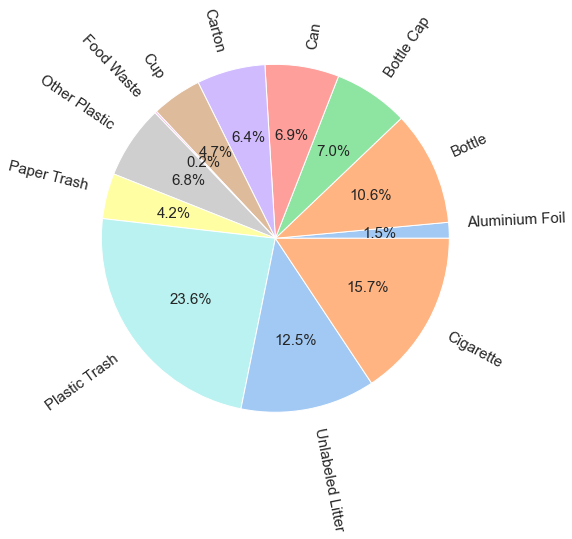

In [55]:
plt.figure(figsize=(8,8))
sns.set_palette("pastel", 30)
plt.pie(count_, labels = labels_, autopct = "%0.1f%%" ,textprops={"fontsize": 15}, rotatelabels=True)
plt.show()

In [56]:
count = 0
for _, value in class_count.items():
    count += value
count

4480

### Check validity of annotations

The bounding boxes convention: <br>

https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

In [57]:
import os

root_dir = os.getcwd()
os.getcwd()

'/Users/ashtonpang/AIAP/team1'

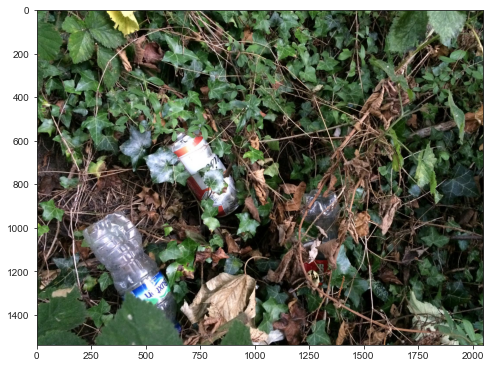

In [58]:
import PIL
from PIL import Image
im = Image.open(root_dir + '/data/taco/images/train/batch_1_000019.jpg')

plt.figure(figsize=(8,8))
plt.imshow(im)
plt.show()

In [59]:
# Function to locate Bounding Boxes in Litter Image based on YOLO bounding box format
import math

def show_bbox(path: str) -> None:

    im = Image.open(path)
    im_width, im_height = im.size
    plt.tight_layout()
    
    img_name = os.path.basename(path).split('.')[0] + '.txt'
    
    with open(os.path.join('./data/taco/labels/train/', img_name)) as file:
        bbox = []
        annotations = file.readlines()
        for line in annotations:
            bbox.append([float(x) for x in line.split()])
    
    if len(bbox) % 2 == 0:
        # Create Grid of Images from Sample
        fig, axs = plt.subplots(nrows=math.ceil(len(bbox)/2), ncols=math.ceil(len(bbox)/2), figsize=(len(bbox)*2, len(bbox)*2))
        fig.suptitle(f'Image: {img_name}', fontsize=16)        
        # axs = axs.flatten()
    elif len(bbox) == 1:
        # Create Grid of Images from Sample
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(len(bbox)*2, len(bbox)*2))
        fig.suptitle(f'Image: {img_name}', fontsize=16) 
    else:
        # Create Grid of Images from Sample
        fig, axs = plt.subplots(nrows=len(bbox)//3, ncols=3, figsize=(len(bbox)*2, len(bbox)*2))
        fig.suptitle(f'Image: {img_name}', fontsize=16) 
    
    for index in range(len(bbox)):
        x_center = bbox[index][1]
        y_center = bbox[index][2]
        crop_width = bbox[index][3] * im_width
        crop_height = bbox[index][4] * im_height
        
        # Setting the points for cropped image
        left = x_center * im_width - crop_width/2
        top = y_center * im_height - crop_height/2
        right = x_center * im_width + crop_width/2
        bottom = y_center * im_height + crop_width/2
        
        img_crop = im.crop((left, top, right, bottom))
        # Add the Image to the Axis
        if len(bbox) > 2:
            axs = axs.flatten()
            axs[index].imshow(img_crop)
            # Add an Axes Title
            axs[index].set(title=f"Class Label: {class_labels[int(bbox[index][0])]} ({int(bbox[index][0])})")
        else:
            axs.imshow(img_crop)
            axs.set(title=f"Class Label: {class_labels[int(bbox[index][0])]} ({int(bbox[index][0])})")
        

<Figure size 432x288 with 0 Axes>

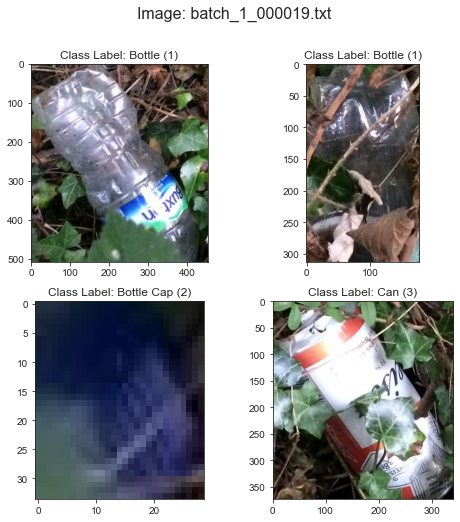

In [60]:
show_bbox(path='./data/taco/images/train/batch_1_000019.jpg')

In [61]:
f = open(root_dir + '/data/taco/labels/train/batch_1_000019.txt', "r")
string = f.readlines()
string

['1 0.212787 0.781392 0.221571 0.365647\n',
 '1 0.635188 0.679896 0.08736 0.290176\n',
 '2 0.316496 0.950878 0.014153 0.025374\n',
 '3 0.370669 0.488289 0.166423 0.2635\n']

In [62]:
with open(root_dir + '/data/taco/labels/train/batch_1_000019.txt', "r") as f:
    string = f.readlines()

In [63]:
# Remove the escape character for new line
string_2 = [line[0:-1] for line in string]
string_2

['1 0.212787 0.781392 0.221571 0.365647',
 '1 0.635188 0.679896 0.08736 0.290176',
 '2 0.316496 0.950878 0.014153 0.025374',
 '3 0.370669 0.488289 0.166423 0.2635']

In [64]:
string_3 = [line.split(' ') for line in string_2]
string_3

[['1', '0.212787', '0.781392', '0.221571', '0.365647'],
 ['1', '0.635188', '0.679896', '0.08736', '0.290176'],
 ['2', '0.316496', '0.950878', '0.014153', '0.025374'],
 ['3', '0.370669', '0.488289', '0.166423', '0.2635']]

In [152]:
np.float(string_3[0][2])

C:\Users\Jansen-Lin\AppData\Local\Temp\ipykernel_7632\3492736308.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float(string_3[0][2])


0.781392

#### Generating Multiple Samples to View their Bounding Boxes

In [74]:
import re
import random

DATASET_PATH = './data/taco/'

# Generate all file names in directory
file_names = [x for x in os.listdir(os.path.join(DATASET_PATH, 'images/train')) if re.search("^[0-9a-zA-Z]+", x)]

# Randomly take out 9 samples from list
sample_names = random.sample(file_names, 9)

sample_names

['batch_7_000076.JPG',
 'batch_10_000095.jpg',
 'batch_15_000058.jpg',
 'batch_5_000114.JPG',
 'batch_6_000011.JPG',
 'batch_12_000043.jpg',
 'batch_9_000071.jpg',
 'batch_8_000063.jpg',
 'batch_9_000009.jpg']

<Figure size 432x288 with 0 Axes>

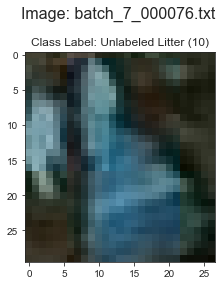

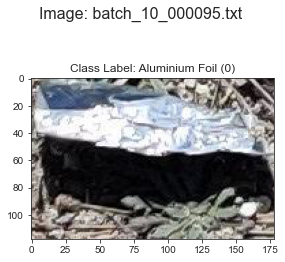

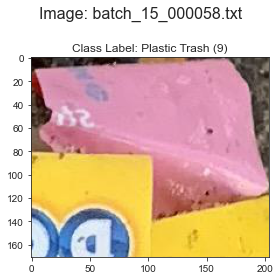

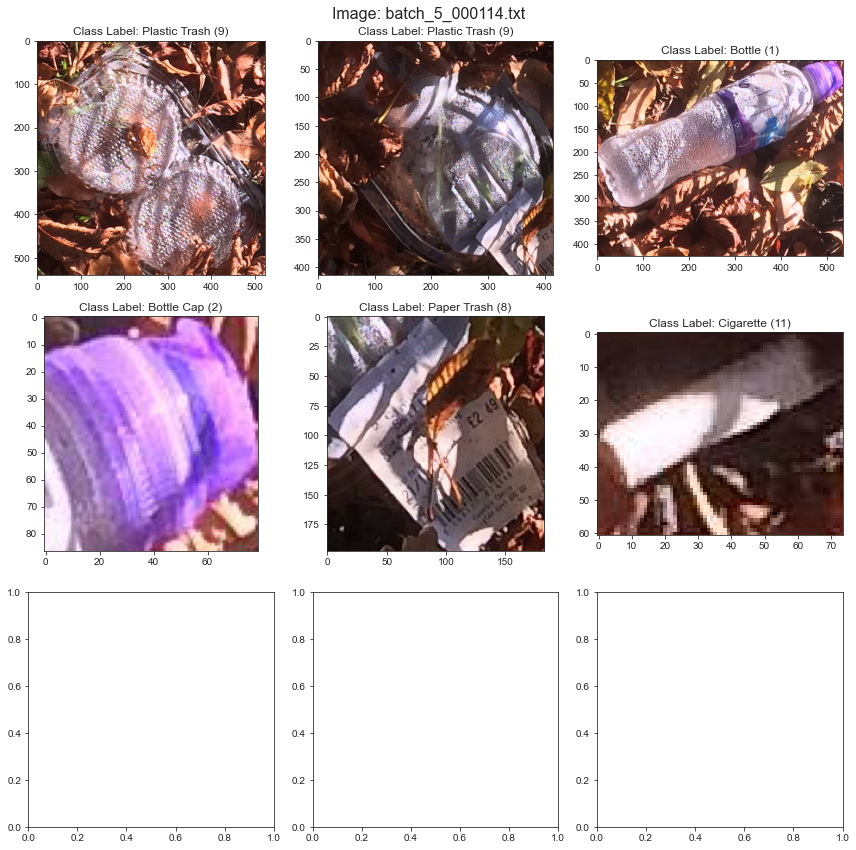

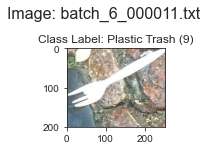

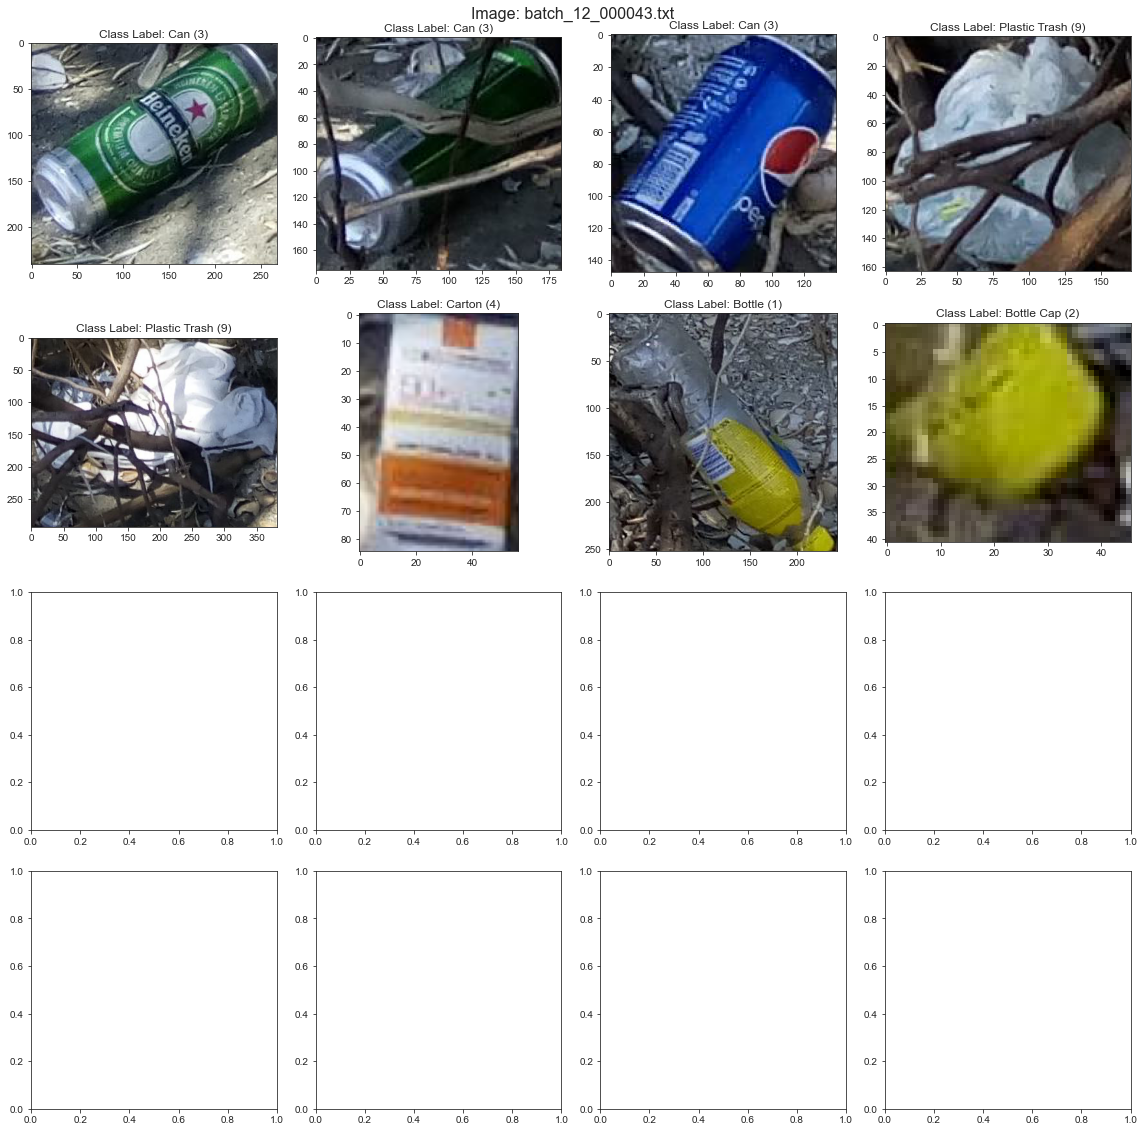

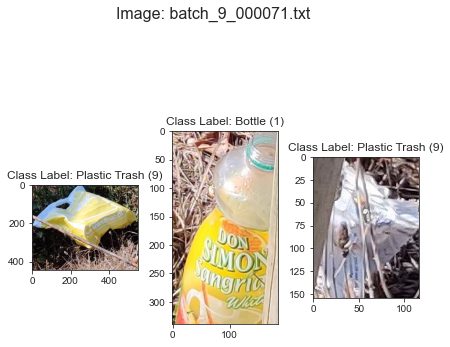

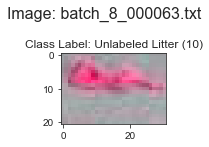

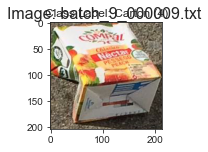

In [75]:
# Generate all labels and cropped images from samples
for item in sample_names:
    show_bbox(path=os.path.join(DATASET_PATH, 'images/train', item))

#### Display the image found to have no annotation in the annotation .txt file. 

In [65]:
# Choose image
img_name = "batch_10_000000"

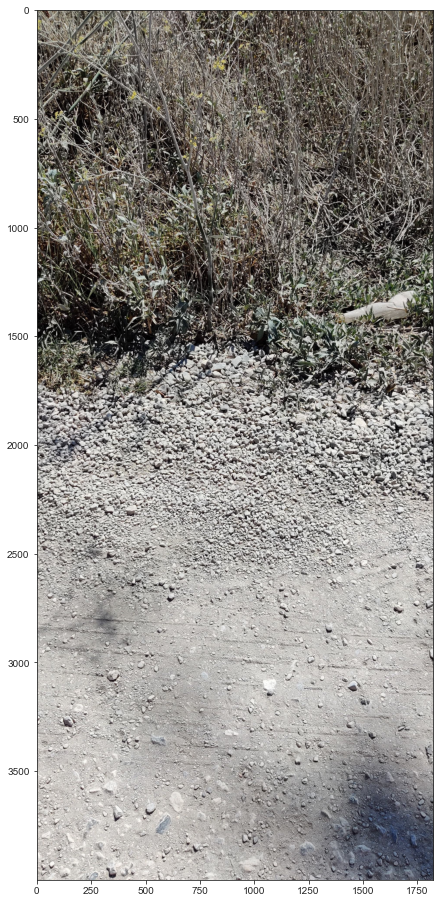

In [67]:
root_dir = os.getcwd()
im = Image.open(root_dir + '/data/taco/images/train/' + f'{img_name}'+ '.jpg')


plt.figure(figsize=(16,16))
plt.imshow(im)
plt.show()

In [69]:
f = open(root_dir + '/data/taco/labels/train/'+f'{img_name}'+'.txt', "r")
string = f.readlines()
string_2 = [line[0:-1] for line in string]
string_3 = [line.split(' ') for line in string_2]

In [70]:
width, height = im.size
print(width, height)

1824 4000


In [71]:
for box in string_3:
    label = box[0]
    x_center = np.float64(box[1]) * width
    y_center = np.float64(box[2]) * height
    width_n = np.float64(box[3]) * width
    height_n = np.float64(box[4]) * height
    left = x_center - width_n/2
    top = y_center - height_n/2
    right = x_center + width_n/2
    bottom = y_center + height_n/2

    slice = im.crop((left, top, right, bottom))
    plt.figure(figsize=(6,6))
    plt.title(f'Label: {class_labels[int(label)]}')
    plt.imshow(slice)

### Just some info about losses that was displayed on the tensorboard

https://www.mdpi.com/2072-666X/12/11/1273/pdf <br>
https://towardsdatascience.com/the-practical-guide-for-object-detection-with-yolov5-algorithm-74c04aac4843 <br>

box_loss: Bounding Box Regression Loss
- Mean Squared Error

cls_loss: Classification loss
- Cross Entropy

obj_loss: Objectness loss
- the confidence of object presence (Binary Cross Entropy)

confidence loss?